In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [4]:
df.shape

(4888, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [7]:
df.replace('Fe Male','Female',inplace=True)

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [10]:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

DurationOfPitch             5.14
MonthlyIncome               4.77
Age                         4.62
NumberOfTrips               2.86
NumberOfChildrenVisiting    1.35
NumberOfFollowups           0.92
PreferredPropertyStar       0.53
TypeofContact               0.51
Designation                 0.00
OwnCar                      0.00
PitchSatisfactionScore      0.00
Passport                    0.00
CustomerID                  0.00
MaritalStatus               0.00
ProdTaken                   0.00
NumberOfPersonVisiting      0.00
Gender                      0.00
Occupation                  0.00
CityTier                    0.00
ProductPitched              0.00
dtype: float64

In [11]:
df.isnull().mean().sort_values(ascending=False)

DurationOfPitch             0.051350
MonthlyIncome               0.047668
Age                         0.046236
NumberOfTrips               0.028642
NumberOfChildrenVisiting    0.013502
NumberOfFollowups           0.009206
PreferredPropertyStar       0.005319
TypeofContact               0.005115
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

In [12]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [13]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for  col in df.columns if df[col].dtype!='object']

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


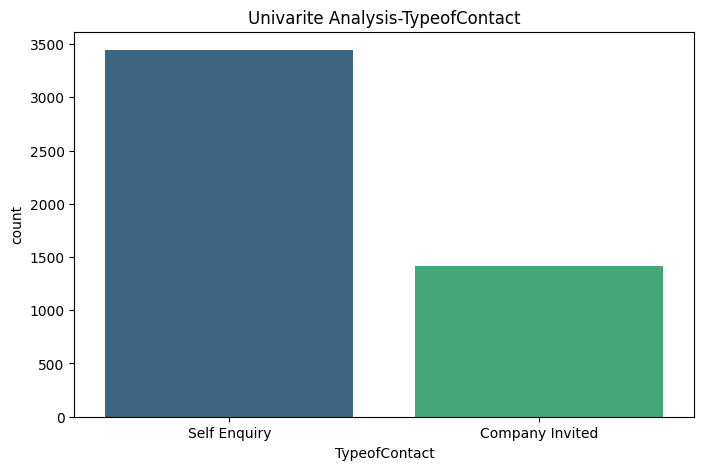

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


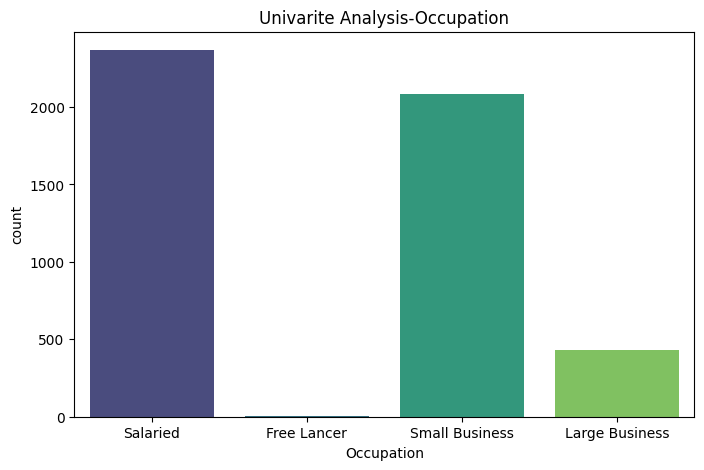

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


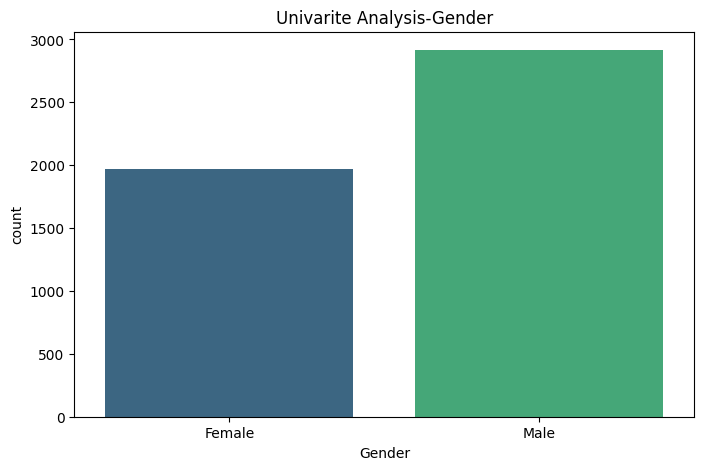

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


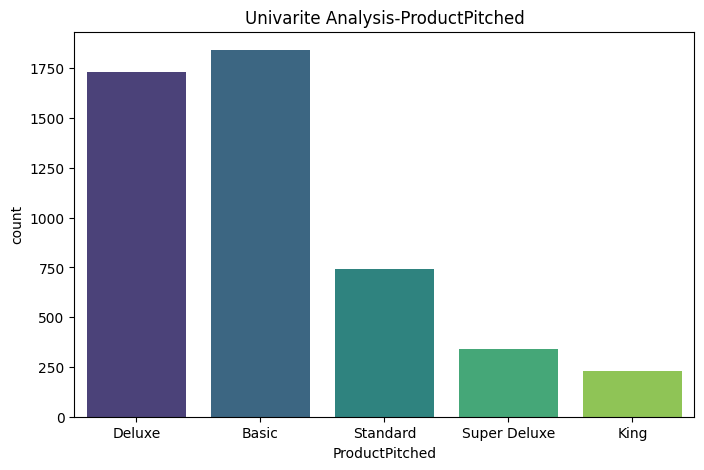

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


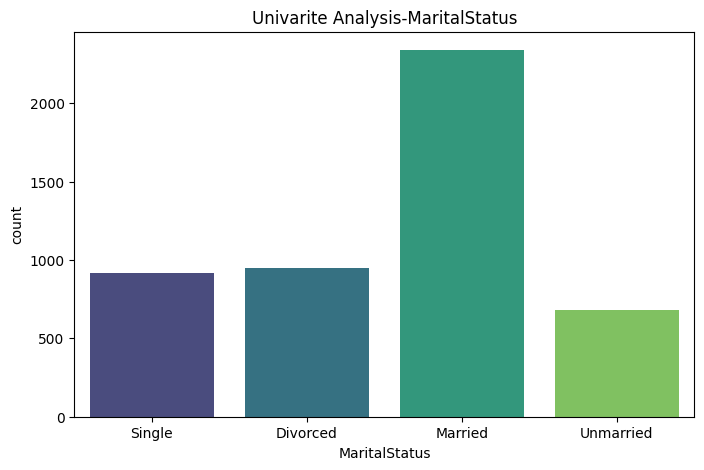

C:\Users\A\AppData\Local\Temp\ipykernel_7512\2778241384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column,data=df,palette='viridis')


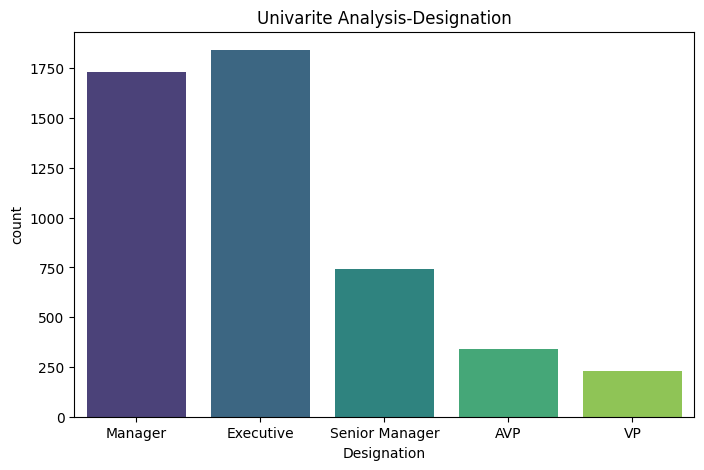

In [14]:
for column in cat_col:
    plt.figure(figsize=(8,5))
    sns.countplot(x=column,data=df,palette='viridis')
    plt.title(f"Univarite Analysis-{column}")
    plt.show()

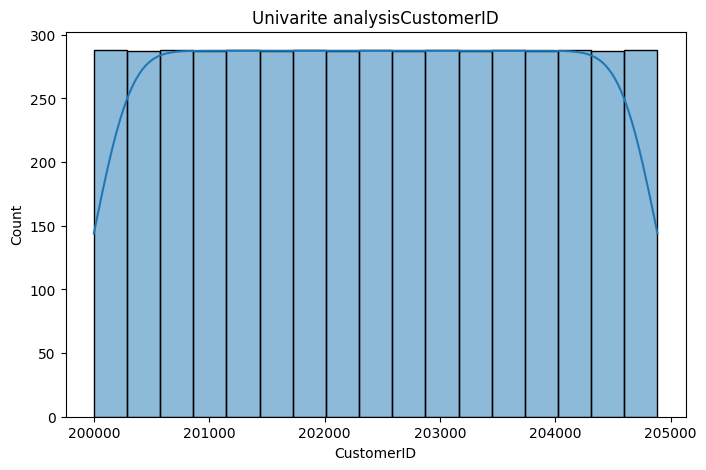

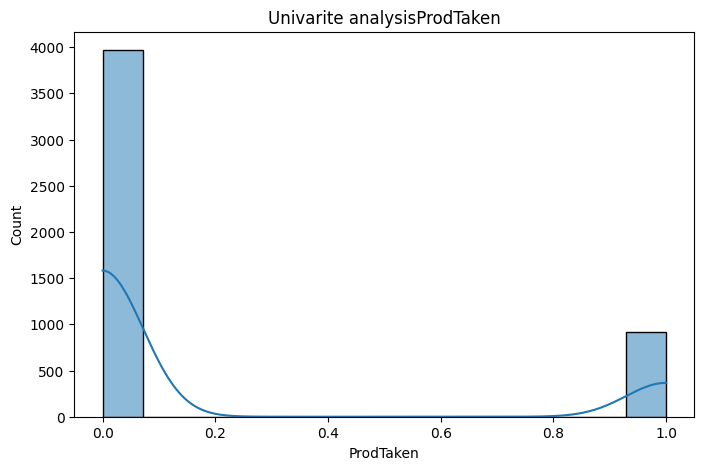

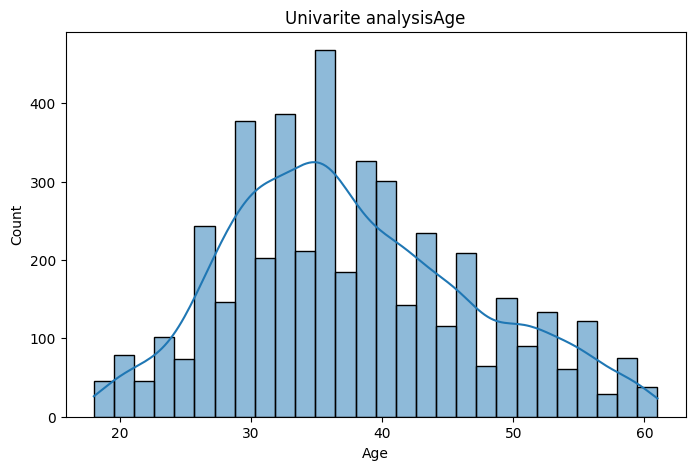

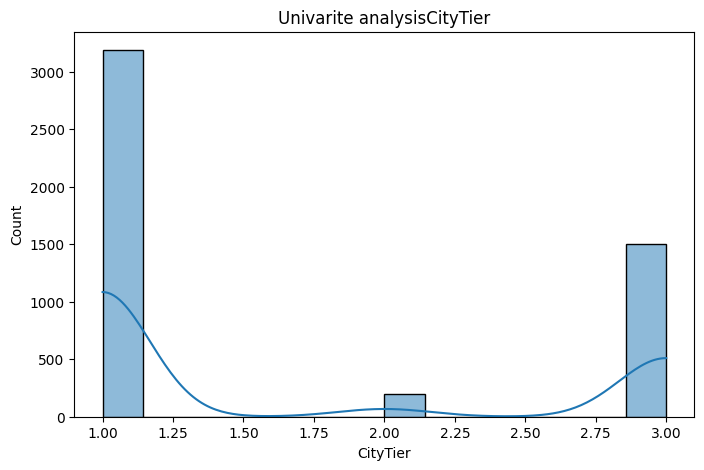

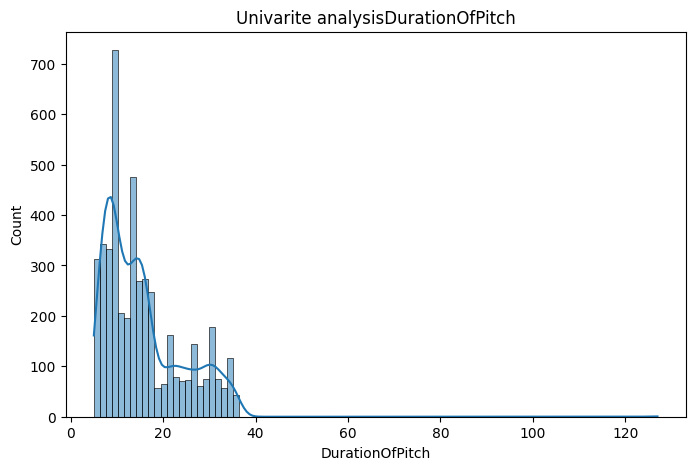

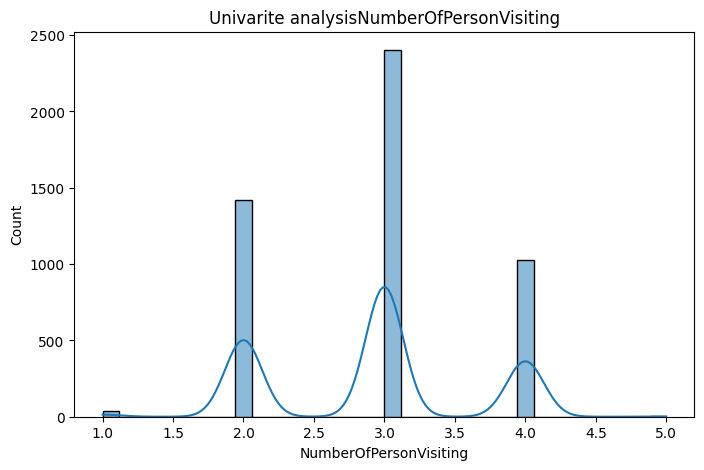

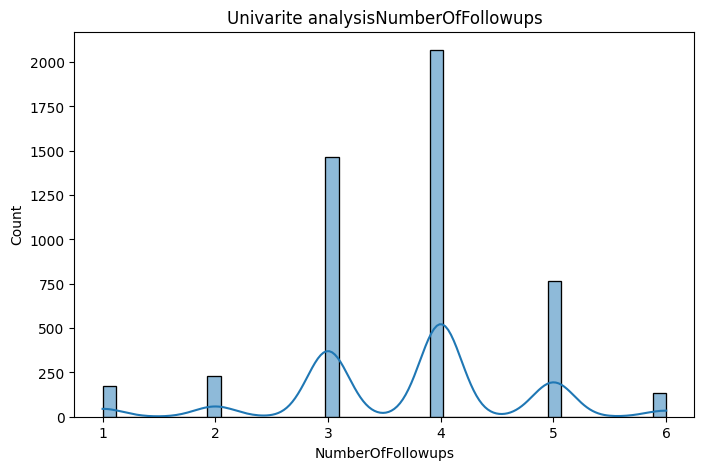

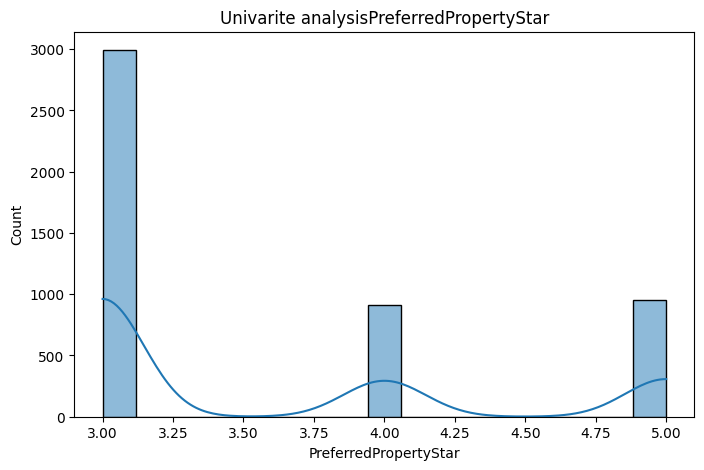

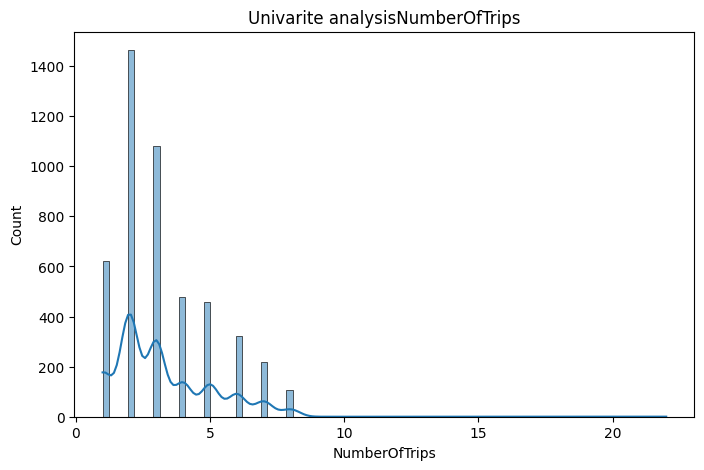

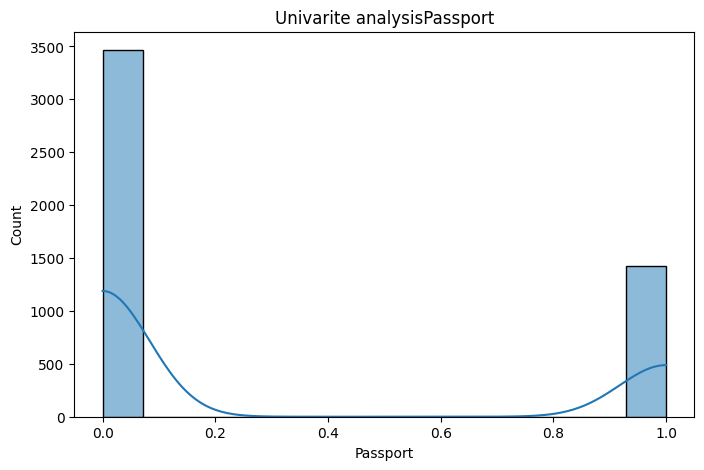

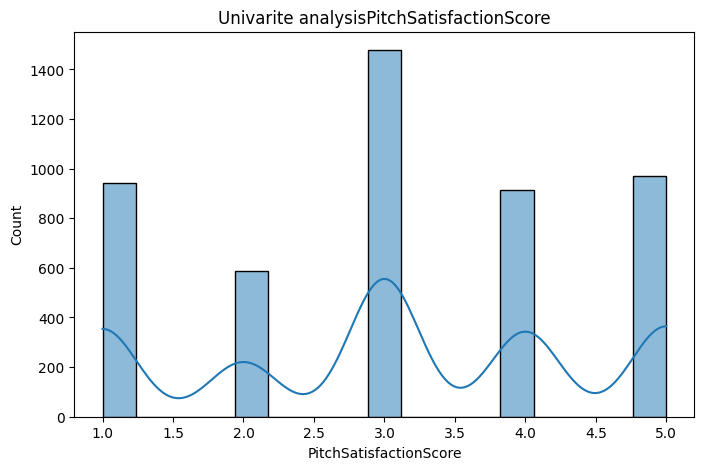

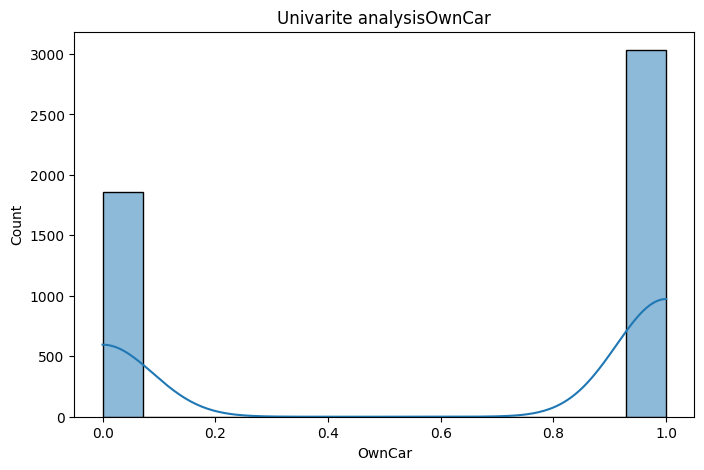

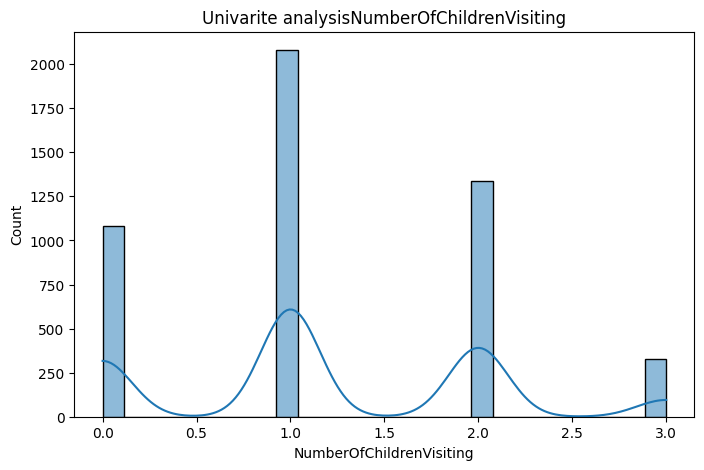

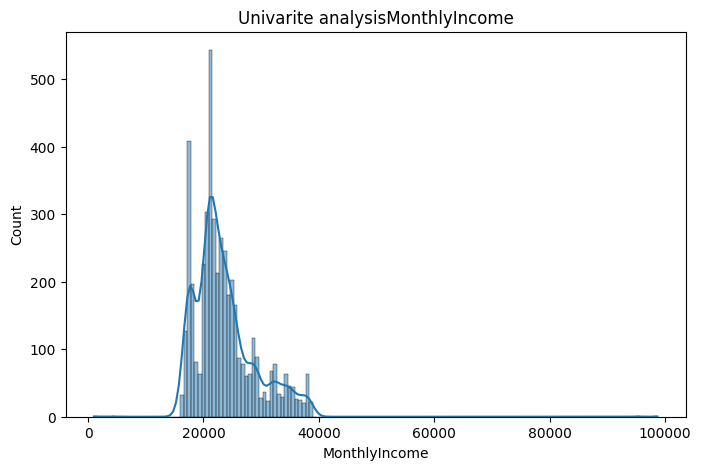

In [15]:
for column in num_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[column],kde=True)
    plt.title(f"Univarite analysis{column}")
    plt.show()

In [18]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [19]:
for i in df[cat_col].columns:
    x=df[i].unique()
    print(f"{i}:{x}")
    print()

TypeofContact:['Self Enquiry' 'Company Invited' nan]

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:['Female' 'Male']

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



<Axes: xlabel='Age', ylabel='DurationOfPitch'>

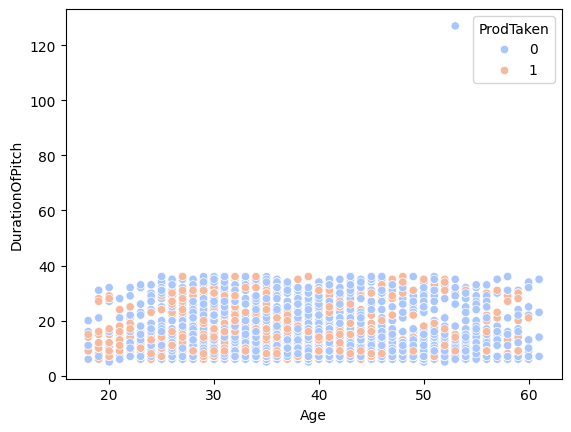

In [21]:
sns.scatterplot(x='Age',y='DurationOfPitch',data=df,hue='ProdTaken',palette='coolwarm')

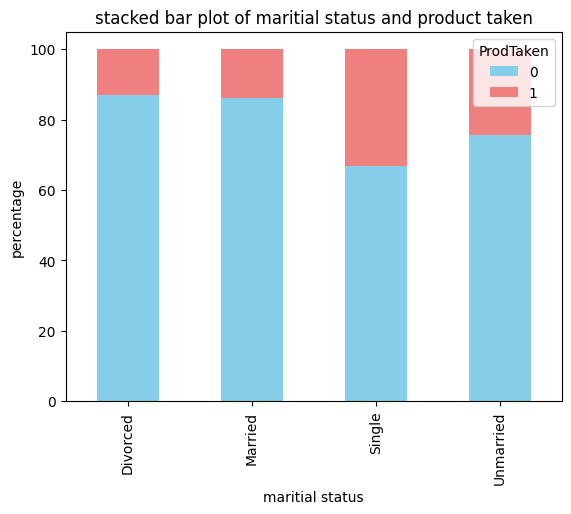

In [30]:
cross_tab=pd.crosstab(df['MaritalStatus'],df['ProdTaken'],normalize='index')*100
cross_tab.plot(kind='bar',stacked=True,color=['skyblue','lightcoral'])
plt.title('stacked bar plot of maritial status and product taken')
plt.xlabel('maritial status')
plt.ylabel("percentage")
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_7512\1427743404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductPitched',y='PitchSatisfactionScore',data=df,palette='dark')


<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

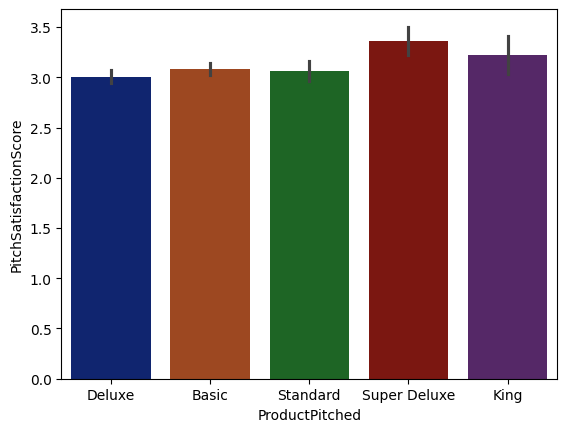

In [36]:
sns.barplot(x='ProductPitched',y='PitchSatisfactionScore',data=df,palette='dark')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

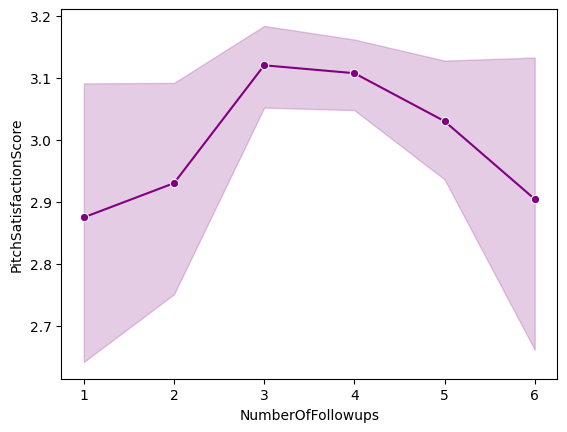

In [40]:
sns.lineplot(x=df['NumberOfFollowups'],y=df['PitchSatisfactionScore'],color='purple',marker='o')

In [41]:
cross_table=pd.crosstab(df['MaritalStatus'],df['ProdTaken'])
cross_table

ProdTaken,0,1
MaritalStatus,,
Divorced,826,124
Married,2014,326
Single,612,304
Unmarried,516,166


<Axes: xlabel='ProdTaken', ylabel='Age'>

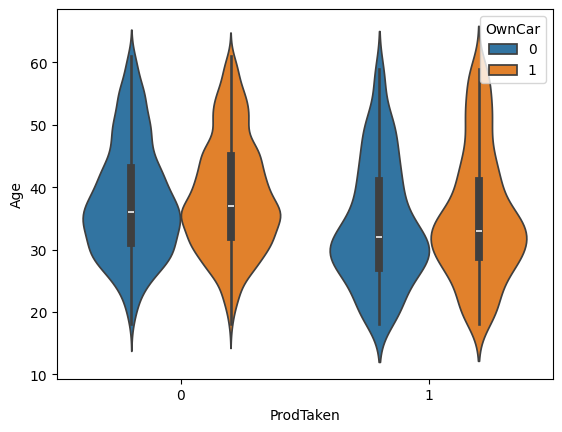

In [42]:
#multivarite analysis
sns.violinplot(x=df['ProdTaken'],y=df['Age'],hue=df['OwnCar'])

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Age'>

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


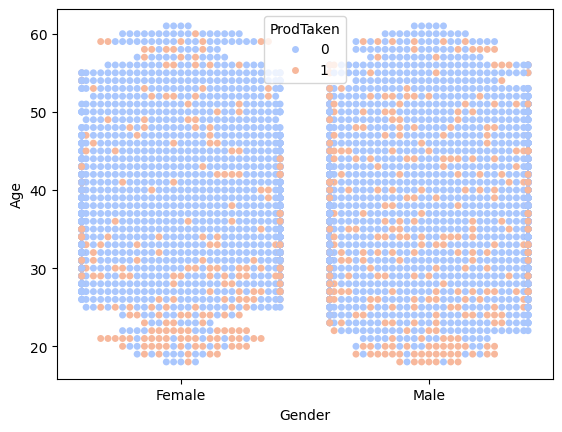

In [43]:
sns.swarmplot(x=df['Gender'],y=df['Age'],hue=df['ProdTaken'],palette='coolwarm')

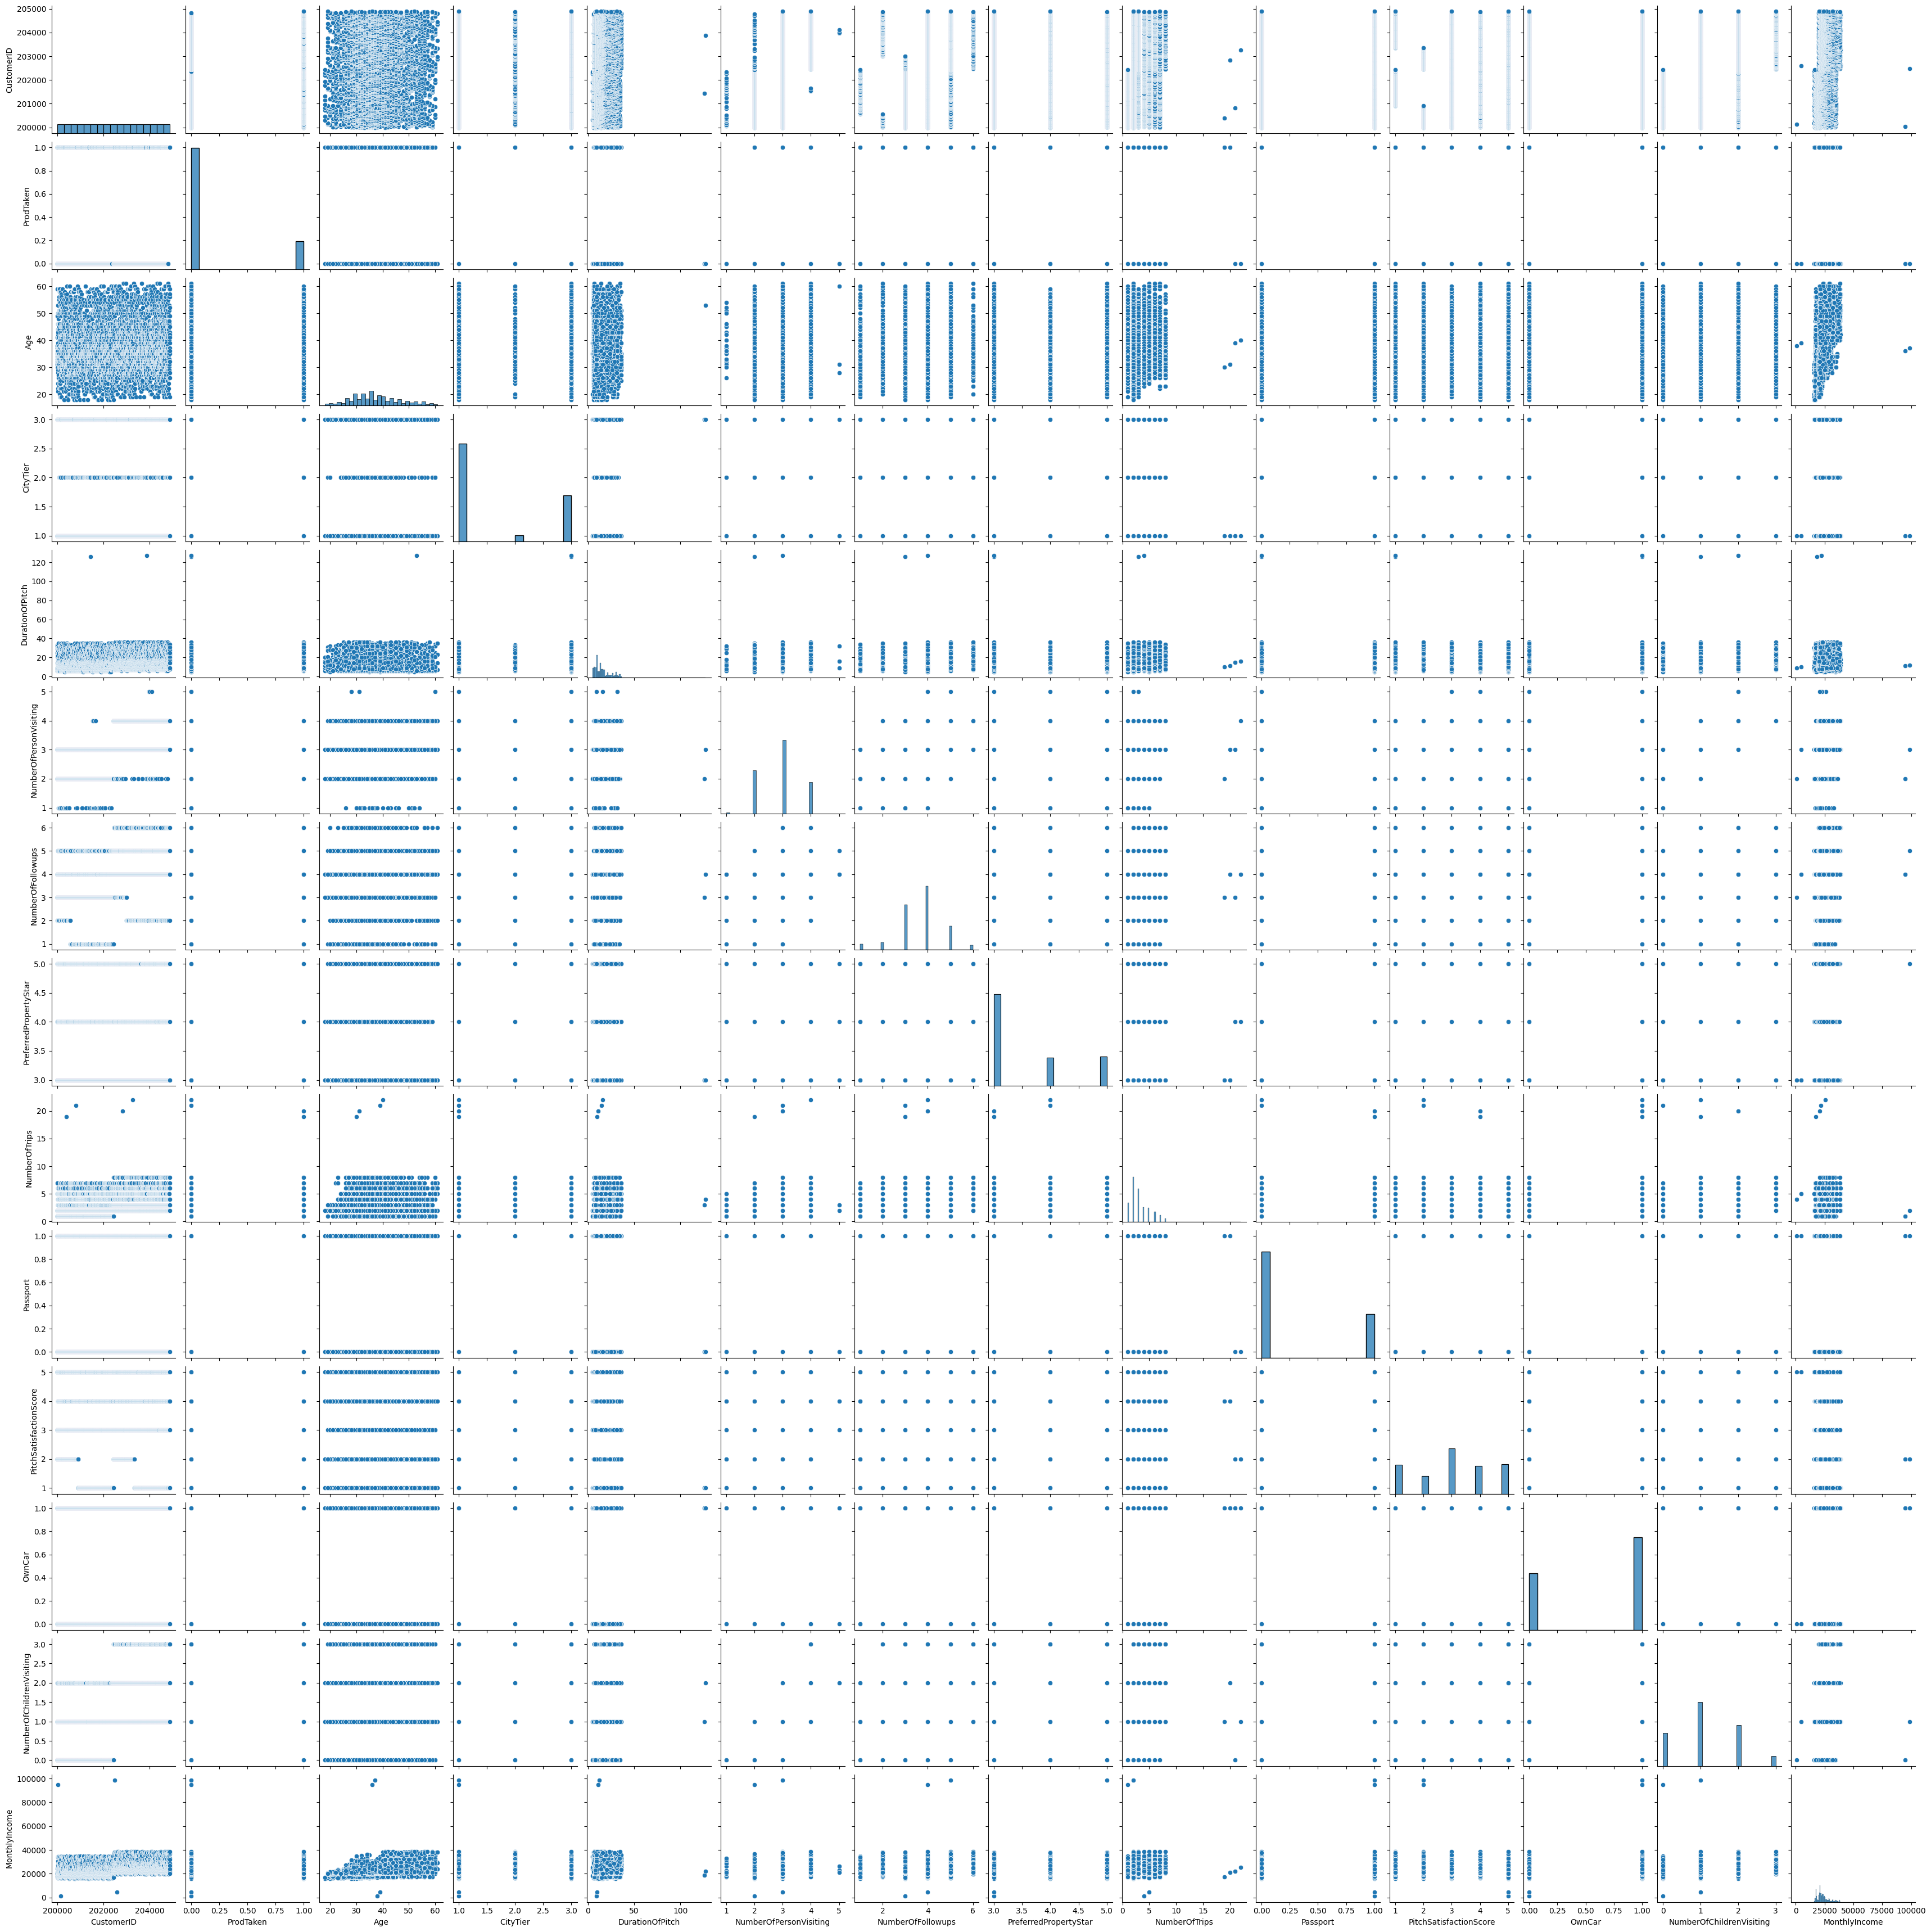

In [44]:
sns.pairplot(df[num_col])

In [52]:
cor_df=df[num_col].corr()

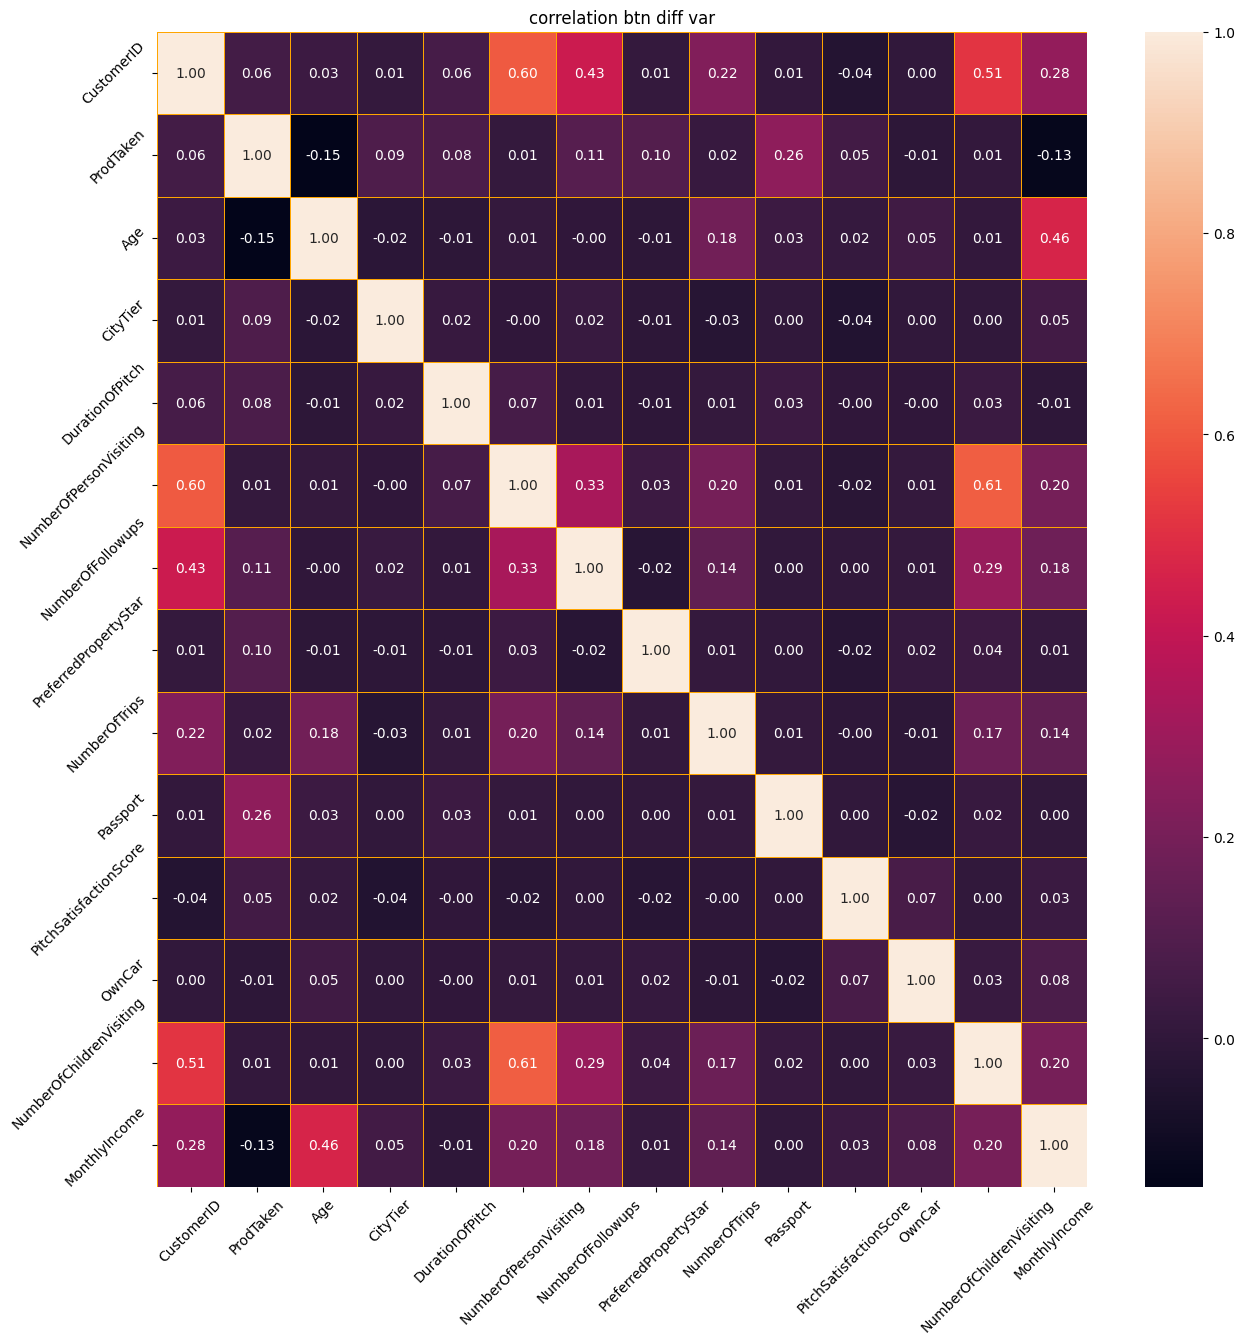

In [59]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cor_df,annot=True,fmt='.2f',ax=ax,linewidth=0.5,linecolor='orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("correlation btn diff var")
plt.show()